## 1.1b Linear Models

### 1.1.12 Generalized Regression
An example with **TweedieRegressor**

In [1]:
from sklearn.linear_model import TweedieRegressor

In [2]:
reg = TweedieRegressor(power = 1, alpha = 0.5, link = 'log')
reg.fit([[0,0], [0,1], [2,2]], [0,1,2])

TweedieRegressor(alpha=0.5, link='log', power=1)

In [3]:
reg.coef_

array([0.24631611, 0.43370317])

In [4]:
reg.intercept_

-0.7638091359123443

Note that the matrix **X** should be standardized before fitting, hich ensures that the penalty treats features equally

### 1.1.13 Stochastic Gradient Descent - SGD

The advantages of Stochastic Gradient Descent are:
* Efficiency.
* Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:
* SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
* SGD is sensitive to feature scaling.

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
X = [[0.,0.], [1.,1.]]
y = [0,1]

clf = SGDClassifier(loss = 'hinge', penalty = 'l2', max_iter = 5)
clf.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [7]:
clf.predict([[2,2]])

array([1])

In [8]:
clf.coef_

array([[9.91080278, 9.91080278]])

In [9]:
clf.intercept_

array([-9.97004991])

In [10]:
clf.decision_function([[2,2]])

array([29.67316119])

The concrete loss function can be set via the loss parameter. SGDClassifier supports the following loss functions:
* `loss="hinge"`: (soft-margin) linear Support Vector Machine,
* `loss="modified_huber"`: smoothed hinge loss,
* `loss="log"`: logistic regression,

and all regression losses below. In this case the target is encoded as -1 or 1, and the problem is treated as a regression problem. The predicted class then correspond to the sign of the predicted target.

In [11]:
clf = SGDClassifier(loss = 'log', max_iter = 5).fit(X,y)
clf.predict_proba([[1,1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[4.97248476e-07, 9.99999503e-01]])

The concrete penalty can be set via the penalty parameter. SGD supports the following penalties:
* `penalty="l2"`: L2 norm penalty on coef_.
* `penalty="l1"`: L1 norm penalty on coef_.
* `penalty="elasticnet"`: Convex combination of L2 and L1; (1 - l1_ratio) * L2 + l1_ratio * L1.

The default setting is `penalty="l2"`


##### Example: **SGD Maximum margin separating hyperplanes**

*Plot the maximum margin sperating hyperplane within a two-class separable dataset using a linear Support Vector Machines classifier trained using SGD*

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

In [13]:
#create 50 separable points
X, Y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)

In [14]:
#instantiate and fit the model
clf = SGDClassifier(loss = 'hinge', alpha = 0.01, max_iter = 200)
clf.fit(X, Y)

SGDClassifier(alpha=0.01, max_iter=200)

In [15]:
#plot the line, points, and nearest vectors to the plane

xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)

In [16]:
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i,j]
    p = clf.decision_function([[x1, x2]])
    Z[i,j] = p[0]

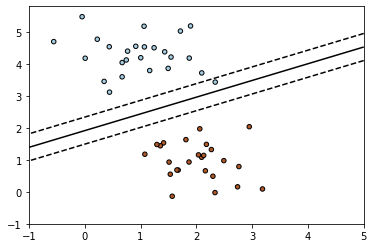

In [17]:
levels = [-1.0, 0.0, 1.0]
linestyles = ["dashed", "solid", "dashed"]
colors = "k"
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)

plt.axis("tight")
plt.show()

Examples I skipped:
##### Plot multi-class SGD on the iris dataset
https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html#sphx-glr-auto-examples-linear-model-plot-sgd-iris-py

##### SGD: weighted samples
https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_weighted_samples.html#sphx-glr-auto-examples-linear-model-plot-sgd-weighted-samples-py

##### Comparing various online solvers:
https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_comparison.html#sphx-glr-auto-examples-linear-model-plot-sgd-comparison-py

##### SVM: separating hyperplane for unbalanced classes
https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-unbalanced-py

#### Looking at the SGDRegressor
Another example

In [18]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)

y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

In [20]:
#always scale the input
#one convenient way is by use of a pipeline
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter = 1000, tol = 1e-3))

reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

### 1.1.14 Perceptron

The `Perceptron` is another simple classification algorithm for large scale learning. It shares the same underlying implementation as `SGDClassifier`, and by default:
* It doesn't require a learning rate
* It is not regularized (penalized)
* It updates its model only on mistakes

In [21]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

In [22]:
X, y = load_digits(return_X_y = True)

clf = Perceptron(tol = 1e-3, random_state = 0)
clf.fit(X, y)

Perceptron()

In [23]:
clf.score(X, y)

0.9393433500278241

### 1.1.15 Passive Aggressive Algorithms

Passive-aggressive algorithms are a family of algorithms forlarge-scale learning. They are similar to Perceptrons because they do not require a learning rate, however they do include a regularization parameter.

In [24]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification

In [25]:
X, y = make_classification(n_features = 4, random_state = 0)

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
clf.fit(X,y)

PassiveAggressiveClassifier(random_state=0)

In [26]:
clf.coef_

array([[0.26642044, 0.45070924, 0.67251877, 0.64185414]])

In [27]:
clf.intercept_

array([1.84127814])

In [28]:
clf.predict([[0,0,0,0]])

array([1])

### 1.1.16 Robustness regression: outliers and modeling errors

Scikit-learn provides three robust regression estimators:
* `RANSAC`
* `Theil Sen`
* `HuberRegressor`

#### 1.1.16.2 RANSAC: **RAN**dom **SA**mple **C**onsensus

This algorithm fits a model from random subsets of inliers from the complete data set. It's a non-deterministic algorithm producing only a reasonable result with a certain probability that depends on the number of iterations.

*It is especially popular in the field of photogrammetric computer vision*

Example: **Robust linear model estimation using RANSAC**, robustly fitting a linear model to faulty data

In [29]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets

In [30]:
n_samples = 1000
n_outliers = 50

In [31]:
X, y, coef = datasets.make_regression(n_samples=n_samples,
                                     n_features=1,
                                     n_informative=1,
                                     noise=10,
                                     coef=True,
                                     random_state=0)

In [32]:
#add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size = (n_outliers,1))
y[:n_outliers] = -3 + 10 * np.random.normal(size = n_outliers)

In [33]:
#fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X,y)

#robustly fit linear model with RANSAC
ransac = linear_model.RANSACRegressor()
ransac.fit(X,y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [34]:
#predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

In [35]:
#compare estimated coefficients
print(f"True: {coef}")
print(f"LinReg: {lr.coef_}")
print(f"RANSAC: {ransac.estimator_.coef_}")

True: 82.1903908407869
LinReg: [54.17236387]
RANSAC: [82.08533159]


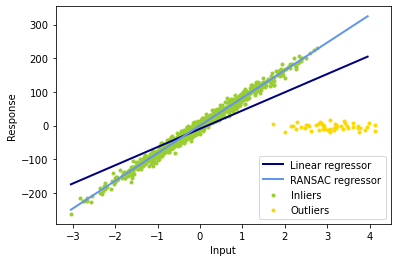

In [36]:
lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

#### 1.1.16.3 Theil-Sen estimator: generalized-mdeian-based estimator

This algorithm uses a generalization of the median in multiple dimensions and is thus robust to multivariate outliers. `TheilSenRegressor` is comparable to Ordinary Least Squares in terms of asymptotic efficiency, and it is also more robust against corrupted data or outliers.


In [37]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor

In [38]:
estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state = 42)),
              ('RANSAC', RANSACRegressor(random_state = 42))]

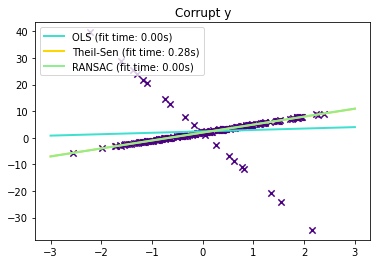

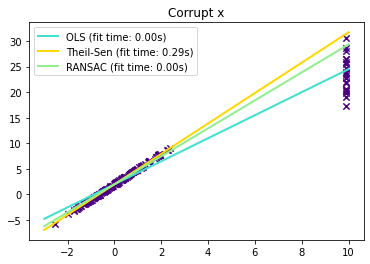

In [39]:
colors = {"OLS": "turquoise", "Theil-Sen": "gold", "RANSAC": "lightgreen"}
lw = 2

# #############################################################################
# Outliers only in the y direction

np.random.seed(0)
n_samples = 200
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
w = 3.0
c = 2.0
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise
# 10% outliers
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]

plt.scatter(x, y, color="indigo", marker="x", s=40)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )

plt.axis("tight")
plt.legend(loc="upper left")
plt.title("Corrupt y")

# #############################################################################
# Outliers in the X direction

np.random.seed(0)
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y = 3 * x + 2 + noise
# 10% outliers
x[-20:] = 9.9
y[-20:] += 22
X = x[:, np.newaxis]

plt.figure()
plt.scatter(x, y, color="indigo", marker="x", s=40)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )

plt.axis("tight")
plt.legend(loc="upper left")
plt.title("Corrupt x")
plt.show()

#### 1.1.16.4 Huber Regression

The `HuberRegressor` is different from Ridge because it applies a linear loss to samples classified as outliers.  it also differs from Theil-Sen and RANSAC because it does not ignore outliers, but rather gives them lesser weights

Example: **HuberRegressor vs Ridge on dataset with strong outliers**

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

In [41]:
#generate toy data
rng = np.random.RandomState(0)

X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100)

In [42]:
#add four strong outliers to the dataset
X_outliers = rng.normal(0, 0.5, size = (4,1))
y_outliers = rng.normal(0, 2, size=4)

X_outliers[:2, :] += X.max() + X.mean() / 4.0
X_outliers[2:, :] += X.min() - X.mean() / 4.0
y_outliers[:2] += y.min() - y.mean() / 4.0
y_outliers[2:] += y.max() + y.mean() / 4.0

X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

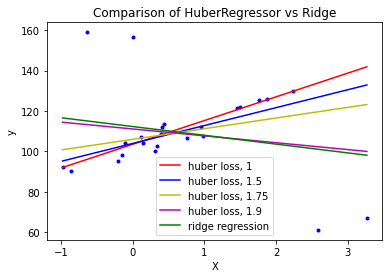

In [43]:
plt.plot(X, y, "b.")

# Fit the huber regressor over a series of epsilon values.
colors = ["r-", "b-", "y-", "m-"]

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1, 1.5, 1.75, 1.9]

for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0, epsilon=epsilon)
    huber.fit(X,y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)
    
#fit a ridge regressor to compare against huber regressor
ridge = Ridge(alpha=0, random_state=0)
ridge.fit(X,y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, "g-", label="ridge regression")

plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()

Another example: **Robust linear estimator fitting**

Fitting a sine function with a polynomial of order 3, for values close to 0

In [44]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (
    LinearRegression, 
    TheilSenRegressor, 
    RANSACRegressor, 
    HuberRegressor
)

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [45]:
np.random.seed(42)

X = np.random.normal(size = 400)
y = np.sin(X)
#make sure X is 2D
X = X[:, np.newaxis]

In [46]:
X_test = np.random.normal(size=200)
X_test = X_test[:, np.newaxis]
y_test = np.sin(X_test)

y_errors = y.copy()
y_errors[::3] = 3
X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10
X_errors_large = X.copy()
X_errors_large[::3] = 10

In [47]:
estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)),
              ("HuberRegressor", HuberRegressor())]

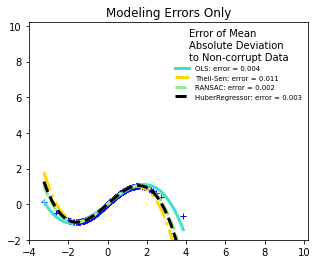

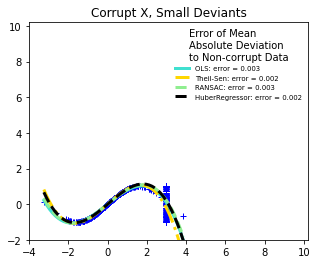

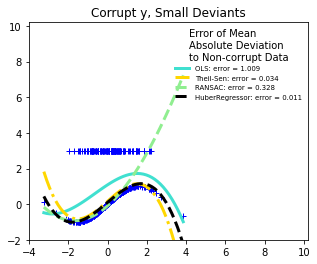

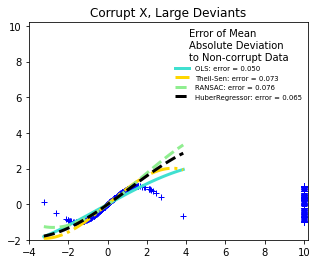

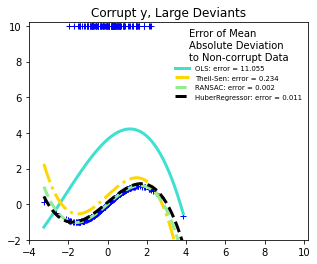

In [48]:
colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "HuberRegressor": "black",
}
linestyle = {"OLS": "-", "Theil-Sen": "-.", "RANSAC": "--", "HuberRegressor": "--"}
lw = 3

x_plot = np.linspace(X.min(), X.max())
for title, this_X, this_y in [
    ("Modeling Errors Only", X, y),
    ("Corrupt X, Small Deviants", X_errors, y),
    ("Corrupt y, Small Deviants", X, y_errors),
    ("Corrupt X, Large Deviants", X_errors_large, y),
    ("Corrupt y, Large Deviants", X, y_errors_large),
]:
    plt.figure(figsize=(5, 4))
    plt.plot(this_X[:, 0], this_y, "b+")

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(
            x_plot,
            y_plot,
            color=colors[name],
            linestyle=linestyle[name],
            linewidth=lw,
            label="%s: error = %.3f" % (name, mse),
        )

    legend_title = "Error of Mean\nAbsolute Deviation\nto Non-corrupt Data"
    legend = plt.legend(
        loc="upper right", frameon=False, title=legend_title, prop=dict(size="x-small")
    )
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()

### 1.1.17 Quantile Regression
Quantile regression estimates the **median** or other quantiles of *y* conditional on *X*, whereas OLS estimates the conditional **mean**. Quantile regression may be useful when predicting an interval rather than a point. Sometimes prediction intervals are calculated based on the assumption that prediction error is normally distributed with zero mean and constant variance, and quantile regression provides sensible prediction intervals even for errors with non-constant variance or non-normal distribution

In [55]:
from sklearn.linear_model import QuantileRegressor
import numpy as np

In [57]:
n_samples, n_features = 10, 2
rng = np.random.RandomState(0)

y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

In [58]:
reg = QuantileRegressor(quantile = 0.8).fit(X,y)
np.mean(y <= reg.predict(X))

0.8

###### Example Part I - generating data
Following along: https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html#sphx-glr-auto-examples-linear-model-plot-quantile-regression-py

In [49]:
import numpy as np

In [64]:
rng = np.random.RandomState(42)
x = np.linspace(start=0, stop=10, num=100)

X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x

In [65]:
y_normal = y_true_mean + rng.normal(loc=0, scale = 0.5 + 0.5 * x, size = x.shape[0])
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size = x.shape[0]) - 1 / (a-1))

In [66]:
import matplotlib.pyplot as plt

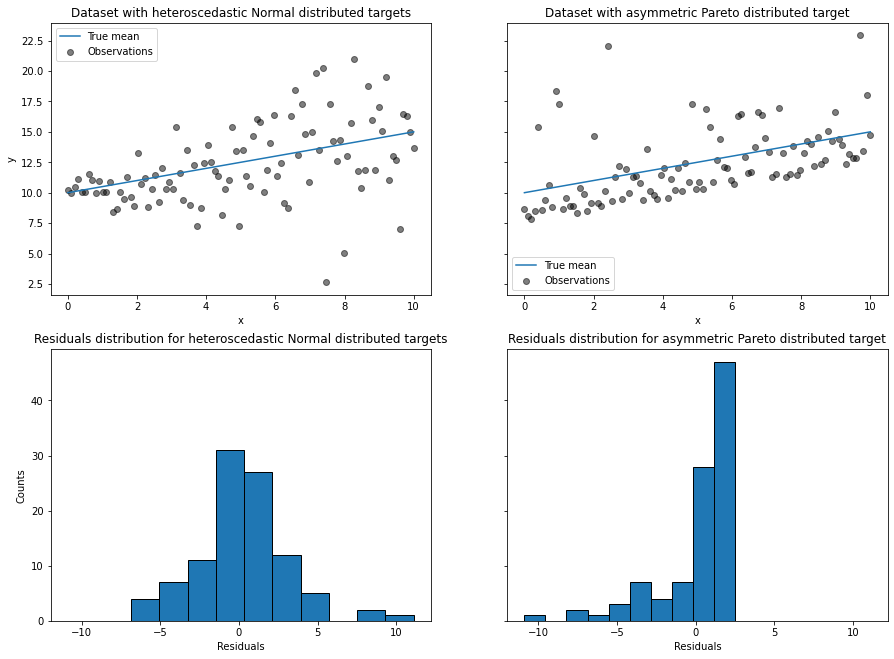

In [67]:
#copypasta
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11), sharex="row", sharey="row")

axs[0, 0].plot(x, y_true_mean, label="True mean")
axs[0, 0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs[1, 0].hist(y_true_mean - y_normal, edgecolor="black")


axs[0, 1].plot(x, y_true_mean, label="True mean")
axs[0, 1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs[1, 1].hist(y_true_mean - y_pareto, edgecolor="black")

axs[0, 0].set_title("Dataset with heteroscedastic Normal distributed targets")
axs[0, 1].set_title("Dataset with asymmetric Pareto distributed target")
axs[1, 0].set_title(
    "Residuals distribution for heteroscedastic Normal distributed targets"
)
axs[1, 1].set_title("Residuals distribution for asymmetric Pareto distributed target")
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 0].set_ylabel("y")
axs[1, 0].set_ylabel("Counts")
axs[0, 1].set_xlabel("x")
axs[0, 0].set_xlabel("x")
axs[1, 0].set_xlabel("Residuals")
_ = axs[1, 1].set_xlabel("Residuals")

###### Example Part 2 - Fitting a QuantileRegressor

In [68]:
from sklearn.linear_model import QuantileRegressor

In [69]:
quantiles = [0.05,0.5,0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)

In [70]:
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X, y_normal).predict(X)
    predictions[quantile] = y_pred
    
    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred <= y_normal)
        
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred <= y_normal)

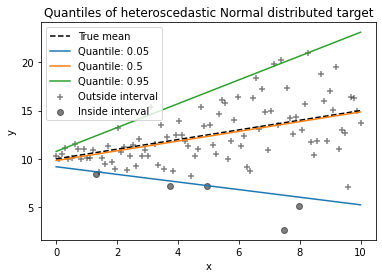

In [71]:
#copypasta
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_normal[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_normal[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")


In [73]:
quantiles = [0.05,0.5,0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype = np.bool_)


In [74]:
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X, y_pareto).predict(X)
    predictions[quantile] = y_pred
    
    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred >= y_pareto)
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred <= y_pareto)

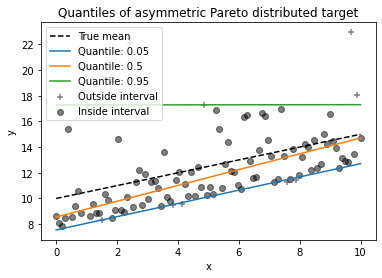

In [75]:
#copypasta
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_pareto[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_pareto[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of asymmetric Pareto distributed target")

###### Another example - Comparing `QuantileRegressor` and `LinearRegression`

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [77]:
linear_regression = LinearRegression()
quantile_regression = QuantileRegressor(quantile = 0.5, alpha = 0)

y_pred_lr = linear_regression.fit(X,y_pareto).predict(X)
y_pred_qr = quantile_regression.fit(X,y_pareto).predict(X)

In [78]:
print(f"{linear_regression.__class__.__name__}")
print(f"MAE = {mean_absolute_error(y_pareto, y_pred_lr)}")
print(f"MSE = {mean_squared_error(y_pareto, y_pred_lr)}")
print(f"{quantile_regression.__class__.__name__}")
print(f"MAE = {mean_absolute_error(y_pareto, y_pred_qr)}")
print(f"MSE = {mean_squared_error(y_pareto, y_pred_qr)}")

LinearRegression
MAE = 1.8047080084873783
MSE = 6.4859681983641595
QuantileRegressor
MAE = 1.6704292382804238
MSE = 7.024976295032465


Notice the **absolute** error is lower for `QuantileRegressor`

Notice the **squared** error is lower for `LinearRegression`

We get the same results when looking at the test error obtained by cross-validation:

In [83]:
from sklearn.model_selection import cross_validate

In [84]:
cv_results_lr = cross_validate(linear_regression, X, y_pareto, cv=3, 
                        scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error'])

cv_results_qr = cross_validate(quantile_regression, X, y_pareto, cv=3,
                        scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error'])

In [85]:
print(f"{linear_regression.__class__.__name__}")
print(f"MAE = {-cv_results_lr['test_neg_mean_absolute_error'].mean()}")
print(f"MSE = {-cv_results_lr['test_neg_mean_squared_error'].mean()}")
print(f"{quantile_regression.__class__.__name__}")
print(f"MAE = {-cv_results_qr['test_neg_mean_absolute_error'].mean()}")
print(f"MSE = {-cv_results_qr['test_neg_mean_squared_error'].mean()}")

LinearRegression
MAE = 1.7317737228780423
MSE = 6.689873285236172
QuantileRegressor
MAE = 1.6792812916356736
MSE = 7.129386617358915


### 1.1.18 Polynomial regression
#### Extending linear models with basis functions

It is a common pattern in ML to use linear models trained on nonlinear functions of the data. This approach maintains the fast performance of linear models while fitting a wider range of data

A simple linear regression can be extended by constructing **polynomial features** from the coefficients

In [86]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [87]:
X = np.arange(6).reshape(3,2)

In [89]:
poly = PolynomialFeatures(degree = 2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Another example with `Pipeline` tools

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [91]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [92]:
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3

In [95]:
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

Another example using *interaction features* that multiply at most *d* distinct features, which can be gotten from `PolynomialFeatures` by setting `interaction_only = True`

In [96]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [97]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = X[:, 0] ^ X[:, 1]

In [101]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [100]:
y

array([0, 1, 1, 0], dtype=int32)

In [102]:
X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)

In [103]:
X

array([[1, 0, 0, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 1, 1]])

In [104]:
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False).fit(X,y)

In [105]:
clf.predict(X)

array([0, 1, 1, 0], dtype=int32)

In [106]:
clf.score(X,y)

1.0